In [1]:
from sklearn import datasets 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris= datasets.load_iris()
X= iris.data[:, [2,3]]
y=iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1, stratify= y)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [5]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution = 0.02):
       #setup marker generator and color map 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, 
                                        x1_max, resolution), 
                              np.arange(x2_min, x2_max,resolution))
        
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
        
    for idx, cl in enumerate(np.unique(y)):
        
           plt.scatter(x=X[y==cl,0], y = X[y == cl,1],
                       alpha = 0.8, c=colors[idx], 
                       marker = markers[idx], 
                       label = cl, 
                       edgecolor='black')
            
            #highlight test samples
    if test_idx:
        X_test,y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:, 1], c='',edgecolor='black', alpha = 1.0, linewidth = 1, marker = 'o',  s = 100,  
                    label = 'test set')            

<ipython-input-5-0aab7ab31ccd>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:,0], X_test[:, 1], c='',edgecolor='black', alpha = 1.0, linewidth = 1, marker = 'o',  s = 100,


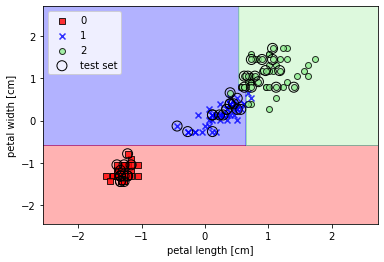

In [6]:
#Building a Decision Tree  
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train_std, y_train)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx = range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')   
plt.show()

<ipython-input-5-0aab7ab31ccd>:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:,0], X_test[:, 1], c='',edgecolor='black', alpha = 1.0, linewidth = 1, marker = 'o',  s = 100,


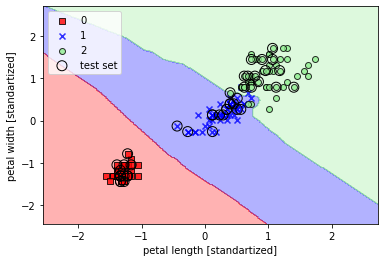

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric= 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx= range(105, 150))
plt.xlabel('petal length [standartized]')
plt.ylabel('petal width [standartized]')
plt.legend(loc='upper left')
plt.show()


In [8]:
#KNN training 
score=[]
score1=[]

for i in range(1, 26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    score.append(knn.score(X_test, y_test))
    score1.append(accuracy_score(y_test, y_pred))
    

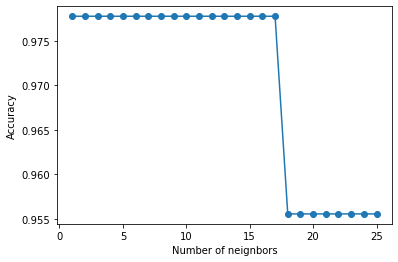

In [9]:
#Plot the scores
plt.plot(range(1,26), score, 'o-')
plt.xlabel('Number of neignbors')
plt.ylabel('Accuracy')
_=plt.show


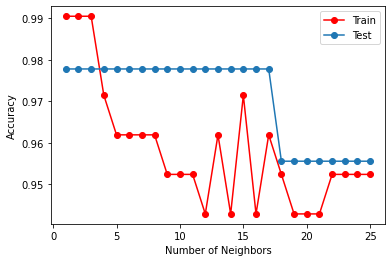

In [10]:
score2=[]
for i in range (1, 26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score2.append(knn.score(X_train, y_train))
    
plt.plot(range(1, 26), score2, 'ro-', label='Train')
plt.plot(range(1, 26), score, 'o-', label='Test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
_=plt.show()
    

In [11]:
from sklearn.tree import export_graphviz

In [12]:
from pydotplus import graph_from_dot_data
dot_data= export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolar', 'Virginica'],
                          feature_names=['petal length', 'petal width'], out_file= None)
graph= graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

In [ ]:
print("My name is Aigerim")
print("My NetID is: aigerim4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")